In [1]:
import pandas as pd 
import numpy as np
import os, sys
import scipy.stats as st
from scipy.stats import ttest_ind
import datetime
import pathlib

confidence_level = 0.95
radius = 0.5
numbers_until_converge = np.zeros(9)

def isvalid(df):
    # cond1 = (df["usertimes"] > df["systemtimes"]).all()
    # cond0 = df.query("videos == '5.mp4'")["scores"].item() >= df.query("videos == '6.mp4'")["scores"].item()

    cond2 = df.query("videos == '1.mp4'")["scores"].item() == df["scores"].max()
    cond3 = df.query("videos == '2.mp4'")["scores"].item() == df["scores"].min()
    cond4 = df.query("videos == '1.mp4'")["sanityscore"].item() == 2
    cond5 = df.query("videos == '2.mp4'")["sanityscore"].item() == 5
    #cond6 = (df.query("videos == '3.mp4'")["sanityscore"].item() == 5) or (df.query("videos == '3.mp4'")["sanityscore"].item() == 4) 
    return  cond2 and cond3 and cond4 and cond5 #and cond6
    #return True

def process_one_file(filename):
    with open(filename, "r") as fin:
        lines = [l.strip("\n") for l in fin]
    scores = [int(v) for v in lines[0].split(',')]
    videos = [f"{v}.mp4" for v in lines[1].split(",")]
    moved_scores = []
    for i in [int(v) for v in lines[1].split(',')]:
        moved_scores.append(scores[i-1])
    scores = moved_scores
    # videos = [f"{v}.mp4" for v in range(1, 10)]
    videos = videos[:len(scores)]
    usertimes = [int(v) for v in lines[2].split(',')]
    systemtimes = [int(v) for v in lines[3].split(',')]
    userid = lines[4]
    sanityscore = [int(v) for v in lines[9].split(',')]
    end_t = os.path.getmtime(filename)
    timestamps = []
    for i in range(len(usertimes)):
        sum = 0
        for j in range(i+1, len(usertimes)):
            sum+=usertimes[j]
        sum /= 1000
        timestamps.append(end_t - sum -1.68*10**9)

    # print(timestamps, usertimes)
    df = pd.DataFrame()

    df["scores"] = scores
    df["videos"] = videos
    df["usertimes"] = usertimes
    df["systemtimes"] = systemtimes
    df["userid"] = userid
    df["sanityscore"] = sanityscore
    df["end_time"] = timestamps
    # print(df["end_time"])
    

    if isvalid(df):
        return df
    else:
        return None



In [2]:
#Set files
filenames = []
# os.listdir("/dataheart/hanchen/qoe_platform/QoE_experiments_2023apr/results_ow1/")

for filepath in pathlib.Path("/dataheart/hanchen/qoe_platform/QoE_experiments_vidplat1/results/").glob('**/*'):
    filenames.append(str(filepath))



In [3]:
# Load files
dfs = []
for file in filenames:
    if "txt" in file:
        df = process_one_file(file)
        try:
            df = process_one_file(file)
            if df is None:
                print(file, "is invalid!")
            else:
                # print(df)
                dfs.append(df)
        except:
            pass
final_df = pd.concat(dfs)

groupedby = final_df[["videos", "scores"]].groupby("videos")


# print(final_df[["videos", "scores"]].groupby("videos").mean().reset_index(drop=True))

        

/dataheart/hanchen/qoe_platform/QoE_experiments_vidplat1/results/A28A3HF3LSEIDT.txt is invalid!
/dataheart/hanchen/qoe_platform/QoE_experiments_vidplat1/results/A2PYXFVGNJPPX0.txt is invalid!
/dataheart/hanchen/qoe_platform/QoE_experiments_vidplat1/results/A16X5FB3HAFCKN.txt is invalid!


In [4]:
sorted_df = pd.concat(dfs).sort_values(by = ["end_time"])
sorted_df.to_csv("/dataheart/hanchen/qoe_platform/QoE_experiments_vidplat1/temp.csv")
# print(len(dfs))

In [5]:
def get_confidence(data):
    return st.t.interval(alpha=confidence_level, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 


In [6]:
flags = np.zeros(7)
counters = np.zeros(7)
num_until_confident_not_equal = np.zeros(7)
stored_numbers = []
sum = 0

for i in range(10):
    stored_numbers.append([])

for index, row in sorted_df.iterrows():
    # print(row)
    id = int(row["videos"].split('.')[0])
    print(id)
    quality = int(row["scores"])
    if (id > 2):
        stored_numbers[id-3].append(quality)


1
2
4
3
5
7
6
1
2
6
7
3
5
4
1
2
3
5
7
4
6
1
2
1
7
2
7
6
3
3
4
4
5
5
6
1
1
2
3
4
7
2
5
3
6
5
6
4
7
1
2
5
1
3
2
7
1
6
2
6
4
7
4
7
5
5
6
3
4
3
1
2
3
7
1
6
2
4
3
5
6
5
4
7
1
2
4
7
6
3
5
1
2
6
5
7
4
3
1
2
6
3
7
5
4
1
2
7
4
3
6
5
1
2
7
4
5
6
3
1
2
5
6
4
3
7
1
2
6
3
5
7
4
1
2
3
5
4
6
7
1
2
7
6
5
4
3
1
2
4
5
6
7
3
1
2
7
3
4
5
6
1
2
3
7
4
5
6
1
2
5
6
7
4
3
1
2
4
5
7
6
3
1
2
6
3
7
4
5


In [7]:
print(stored_numbers[9])

[]


/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
No artists with

[2, 2, 4, 3, 2]
[2.6, 2.6, 2.2, 2.0, 2.4, nan, nan, nan]


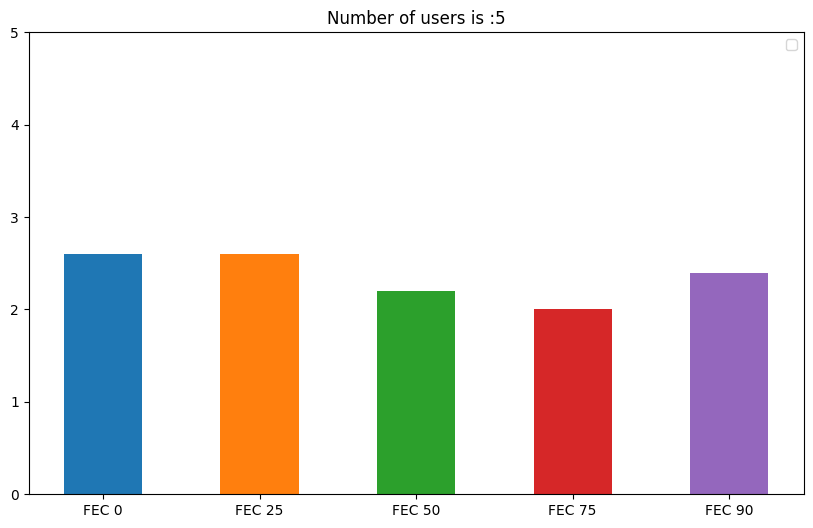

/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
No artists with

[2, 2, 4, 3, 2, 3, 4, 2, 4, 2]
[2.8, 2.8, 2.5, 2.0, 2.4, nan, nan, nan]


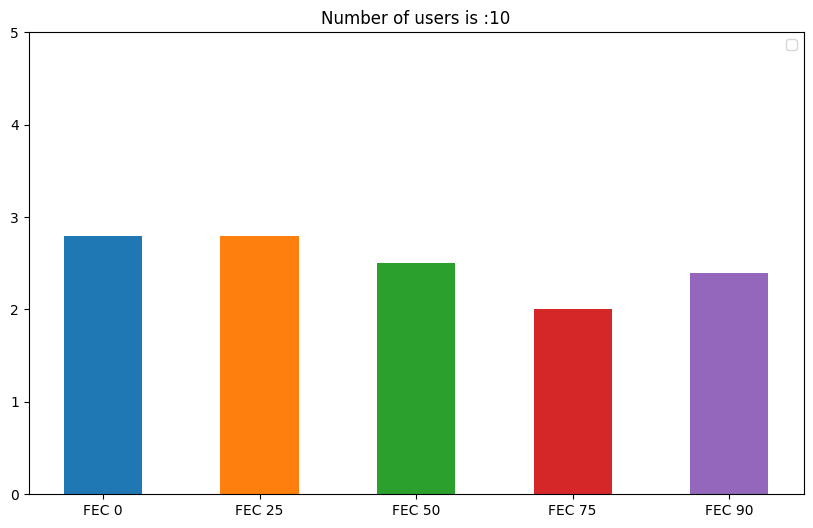

/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
No artists with

[2, 2, 4, 3, 2, 3, 4, 2, 4, 2, 1, 4, 2, 2, 3]
[2.6666666666666665, 2.6666666666666665, 2.4, 2.066666666666667, 2.2666666666666666, nan, nan, nan]


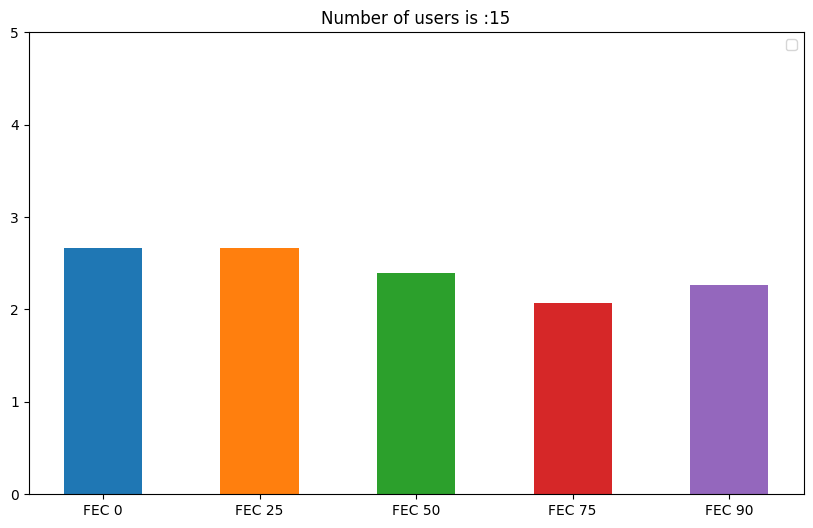

/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
No artists with

[2, 2, 4, 3, 2, 3, 4, 2, 4, 2, 1, 4, 2, 2, 3, 2, 2, 2, 3, 3]
[2.6, 2.55, 2.35, 2.1, 2.3, nan, nan, nan]


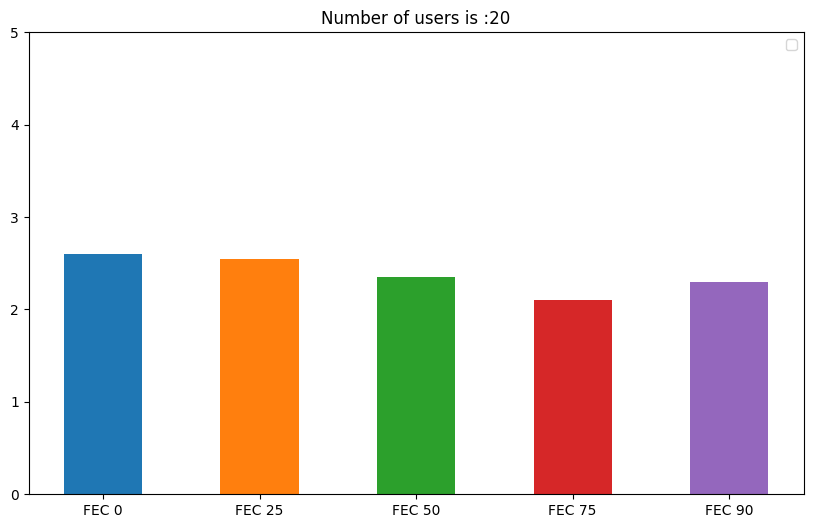

/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/dataheart/hanchen/anaconda3/envs/ae-env/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
No artists with

[2, 2, 4, 3, 2, 3, 4, 2, 4, 2, 1, 4, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 4]
[2.6, 2.6, 2.32, 2.12, 2.36, nan, nan, nan]


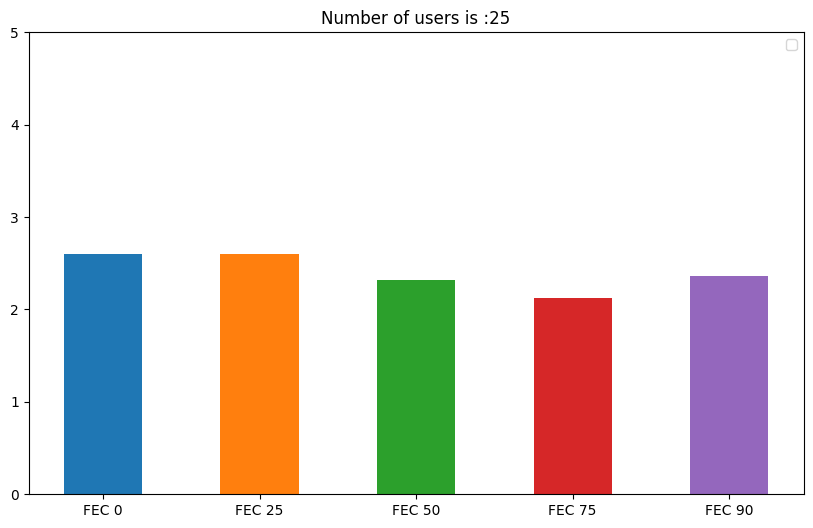

In [8]:
intervals = [5, 10, 15, 20, 25]
mean_intervals = [[],[],[],[],[],[],[],[]]
std_intervals = [[],[],[],[],[],[],[],[]]
import matplotlib.pyplot as plt
for checkpoint in intervals:
    means = []
    stds = []
    print(stored_numbers[0][:checkpoint])

    for i in range(8):
        mean_intervals[i]= (np.mean(stored_numbers[i][:checkpoint]))
        means.append(np.mean(stored_numbers[i][:checkpoint]))
        # print(stored_numbers[i][:checkpoint])
        std_intervals[i].append(np.std(stored_numbers[i][:checkpoint]) / np.sqrt(checkpoint))
        stds.append(np.std(stored_numbers[i][:checkpoint]) / np.sqrt(checkpoint))

    fig = plt.figure(figsize = (10, 6))

    x = np.array(["FEC 0", "FEC 25", "FEC 50", "FEC 75", "FEC 90"])
    print(mean_intervals)
    for i in range(5):
        plt.bar(x[i], mean_intervals[i], width = 0.5)

    plt.ylim(0, 5)
    # plt.xlim(0, 60)
    plt.legend(
    )
    plt.title(f"Number of users is :{str(checkpoint)}")
    plt.savefig(f"/dataheart/hanchen/qoe_platform/QoE_experiments_vidplat1/graphs/{str(checkpoint)}.png")
    plt.show()

    # mean_intervals.append(means)
    # std_intervals.append(stds)



    # print(stds[1])
    # # Build the plot
    # fig, ax = plt.subplots()
    # ax.bar(range(8), means,
    #     yerr=stds,
    #     align='center',
    #     alpha=0.5,
    #     ecolor='black',
    #     capsize=10)

    # # ax.set_xticks(x_pos)
    # # ax.set_xticklabels(labels)
    # ax.yaxis.grid(True)
    # plt.show()

<Figure size 2000x1200 with 0 Axes>

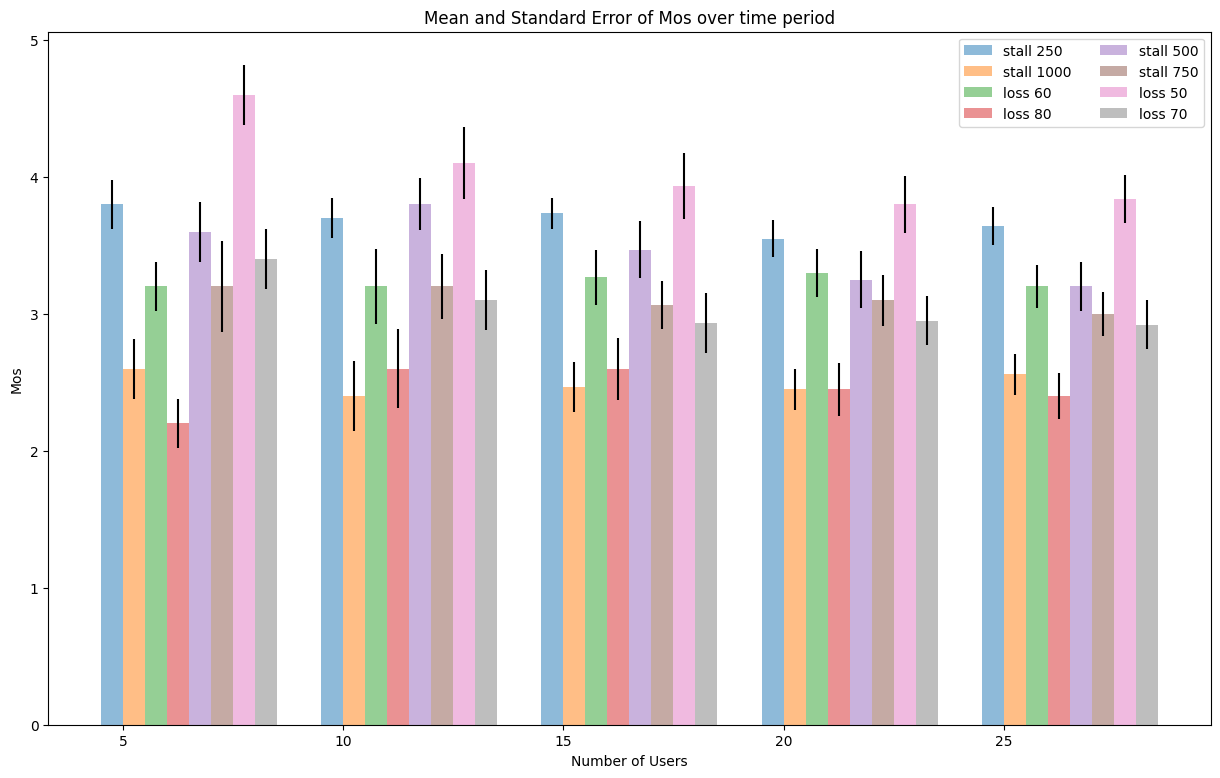

In [13]:

categories = ['stall 250','stall 1000', 'loss 60', 'loss 80', 'stall 500', 'stall 750', 'loss 50', 'loss 70']
bar_positions = np.arange(5)
plt.figure(figsize= (20, 12))

# Create a figure and axes
fig, ax = plt.subplots(figsize = (15, 9))

bar_width = 0.1

# Plot the first set of bars
for i in range(8):
    ax.bar(bar_positions + bar_width * i, mean_intervals[i], bar_width, yerr = std_intervals[i], alpha = 0.5, label=categories[i])

# Plot the second set of bars with an offset
# ax.bar(bar_positions + bar_width, values2, bar_width, label='Data 2')

# Set the labels and title
ax.set_xlabel('Number of Users')
ax.set_ylabel('Mos')
ax.set_title('Mean and Standard Error of Mos over time period')
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(intervals)
plt.legend(ncol =2)

# Display the plot
plt.show()

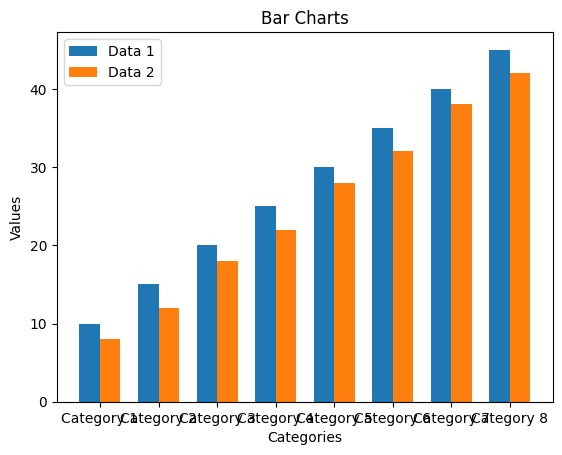

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar charts
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6', 'Category 7', 'Category 8']
values1 = [10, 15, 20, 25, 30, 35, 40, 45]
values2 = [8, 12, 18, 22, 28, 32, 38, 42]

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions = np.arange(len(categories))

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the first set of bars
ax.bar(bar_positions, values1, bar_width, label='Data 1')

# Plot the second set of bars with an offset
ax.bar(bar_positions + bar_width, values2, bar_width, label='Data 2')

# Set the labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Bar Charts')
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()